# Proyecto: Predicción de Incumplimiento de Pago con Regresión Logística

Este proyecto adapta el enfoque del artículo [Logistic Regression in Python](https://medium.com/@polanitzer/logistic-regression-in-python-predict-the-probability-of-default-of-an-individual-8a0091da3775) para predecir la probabilidad de `default` en un conjunto de datos reales de préstamos.

## 1. Cargar librerías y datos

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Cargar los datos
df = pd.read_csv("Loan_default.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,loanid,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## 2. Preprocesamiento de Datos

In [25]:
# Convertir variables categóricas binarias
df['hasmortgage'] = df['hasmortgage'].map({'Yes': 1, 'No': 0})
df['hasdependents'] = df['hasdependents'].map({'Yes': 1, 'No': 0})
df['hascosigner'] = df['hascosigner'].map({'Yes': 1, 'No': 0})

# One-hot encoding para columnas categóricas restantes
df = pd.get_dummies(df, columns=['education', 'employmenttype', 'maritalstatus', 'loanpurpose'], drop_first=True)

# Eliminar columnas no numéricas irrelevantes
df = df.drop(columns=['loanid'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   age                           255347 non-null  int64  
 1   income                        255347 non-null  int64  
 2   loanamount                    255347 non-null  int64  
 3   creditscore                   255347 non-null  int64  
 4   monthsemployed                255347 non-null  int64  
 5   numcreditlines                255347 non-null  int64  
 6   interestrate                  255347 non-null  float64
 7   loanterm                      255347 non-null  int64  
 8   dtiratio                      255347 non-null  float64
 9   hasmortgage                   255347 non-null  int64  
 10  hasdependents                 255347 non-null  int64  
 11  hascosigner                   255347 non-null  int64  
 12  default                       255347 non-nul

## 3. Separar variables predictoras y objetivo

In [26]:
X = df.drop(columns=['default'])
y = df['default']

## 4. Dividir en conjunto de entrenamiento y prueba

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Escalamiento de variables

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. Entrenamiento del modelo de Regresión Logística

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## 7. Evaluación del modelo

In [30]:
y_pred = model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))

[[67492   189]
 [ 8617   307]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.62      0.03      0.07      8924

    accuracy                           0.89     76605
   macro avg       0.75      0.52      0.50     76605
weighted avg       0.86      0.89      0.84     76605

ROC AUC Score: 0.7491997370717223


## 8. Interpretación de coeficientes

In [31]:
coeff_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_[0]
}).sort_values(by='Coeficiente', key=abs, ascending=False)
coeff_df

,Variable,Coeficiente
0,age,-0.590843
6,interestrate,0.452851
1,income,-0.344406
4,monthsemployed,-0.335094
2,loanamount,0.297488
17,employmenttype_Unemployed,0.196133
11,hascosigner,-0.140861
10,hasdependents,-0.123903
15,employmenttype_Part-time,0.123163
3,creditscore,-0.121288


## 9. Visualización de Importancia

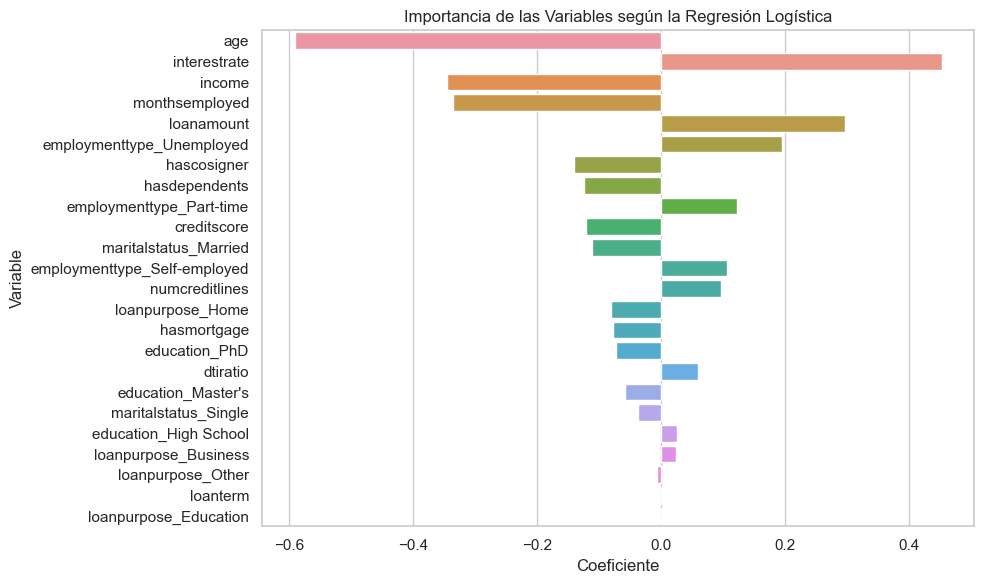

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coeficiente', y='Variable', data=coeff_df)
plt.title("Importancia de las Variables según la Regresión Logística")
plt.tight_layout()
plt.show()

c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


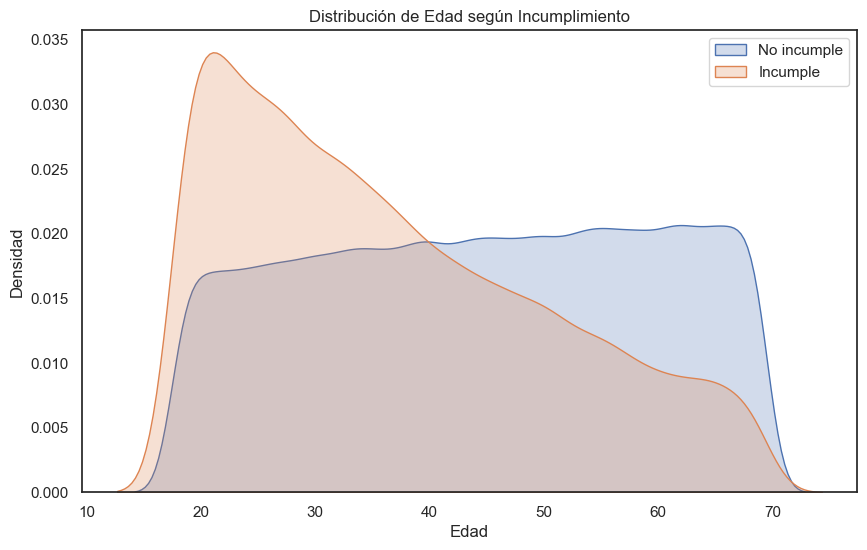

In [33]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Configuración visual
sns.set(style="white")
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

# Cargar el dataset
data = pd.read_csv("Loan_default.csv")

# Gráfico KDE de la variable Age por estado de incumplimiento
sns.kdeplot(data=data[data['Default'] == 0], x='Age', fill=True, label='No incumple')
sns.kdeplot(data=data[data['Default'] == 1], x='Age', fill=True, label='Incumple')

plt.title("Distribución de Edad según Incumplimiento")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [34]:
print("No incumplió:")
print(data['Age'].loc[data['Default'] == 0].describe())

print("\nSí incumplió:")
print(data['Age'].loc[data['Default'] == 1].describe())

No incumplió:
count    225694.000000
mean         44.409962
std          14.889574
min          18.000000
25%          32.000000
50%          45.000000
75%          57.000000
max          69.000000
Name: Age, dtype: float64

Sí incumplió:
count    29653.000000
mean        36.559539
std         13.897468
min         18.000000
25%         25.000000
50%         34.000000
75%         47.000000
max         69.000000
Name: Age, dtype: float64


c:\Users\ramse\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9733 (\N{BLACK STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


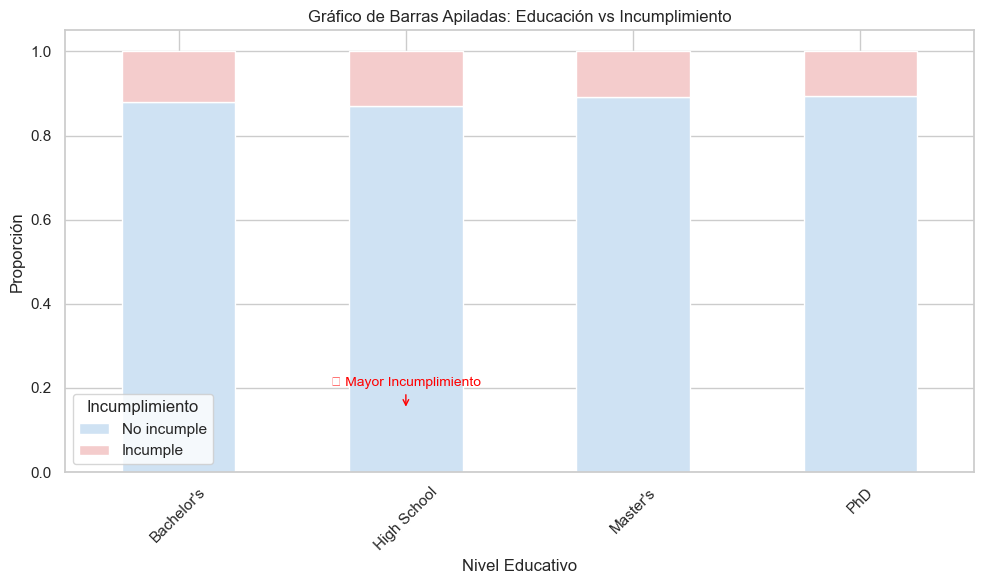

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear tabla cruzada
table = pd.crosstab(data['Education'], data['Default'])

# Normalizar por fila para obtener proporciones
proportions = table.div(table.sum(1).astype(float), axis=0)

# Colores personalizados suaves: azul claro (no incumple), naranja claro (incumple)
colors = ['#cfe2f3', '#f4cccc']  # tonos suaves

# Graficar barras apiladas con colores definidos
ax = proportions.plot(kind='bar', stacked=True, color=colors)

plt.title('Gráfico de Barras Apiladas: Educación vs Incumplimiento')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción')
plt.legend(title='Incumplimiento', labels=['No incumple', 'Incumple'])
plt.xticks(rotation=45)
plt.tight_layout()

# Añadir marca al mayor incumplimiento
if 1 in proportions.columns:
    max_idx = proportions[1].idxmax()
    max_val = proportions[1].max()

    plt.annotate('★ Mayor Incumplimiento',
                 xy=(list(proportions.index).index(max_idx), max_val + 0.02),
                 xytext=(0, 15),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=10,
                 color='red',
                 arrowprops=dict(arrowstyle='->', color='red'))

plt.show()

c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


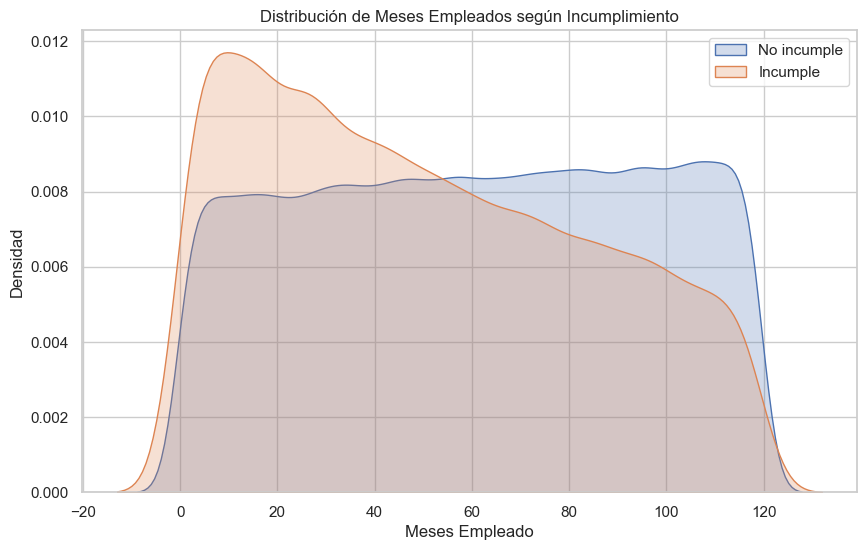

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de gráfico
sns.set(style="whitegrid")

# KDE plot para comparar distribución de MonthsEmployed según Default
sns.kdeplot(data=data[data['Default'] == 0], x='MonthsEmployed', fill=True, label='No incumple')
sns.kdeplot(data=data[data['Default'] == 1], x='MonthsEmployed', fill=True, label='Incumple')

plt.title("Distribución de Meses Empleados según Incumplimiento")
plt.xlabel("Meses Empleado")
plt.ylabel("Densidad")
plt.legend()
plt.show()

c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


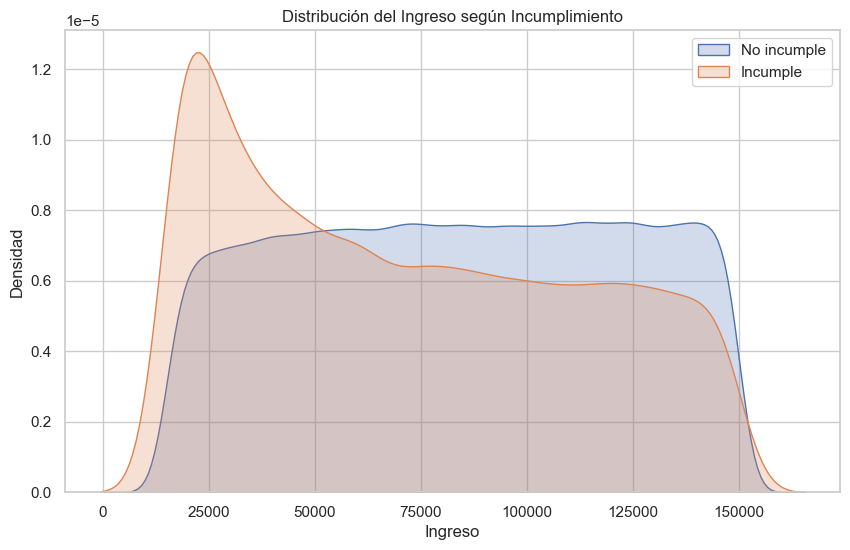

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumimos que la variable es 'Income' y la target es 'Default'
sns.kdeplot(data=data[data['Default'] == 0], x='Income', fill=True, label='No incumple')
sns.kdeplot(data=data[data['Default'] == 1], x='Income', fill=True, label='Incumple')

plt.title("Distribución del Ingreso según Incumplimiento")
plt.xlabel("Ingreso")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [77]:
# Estadísticas descriptivas de ingreso según incumplimiento
print("No incumple:")
print(data['Income'].loc[data['Default'] == 0].describe())

print("\nSí incumple:")
print(data['Income'].loc[data['Default'] == 1].describe())

No incumple:
count    225694.000000
mean      83899.165995
std       38498.801232
min       15000.000000
25%       50994.000000
50%       84237.500000
75%      117186.750000
max      149999.000000
Name: Income, dtype: float64

Sí incumple:
count     29653.000000
mean      71844.722659
std       40785.099507
min       15004.000000
25%       34022.000000
50%       66566.000000
75%      106895.000000
max      149995.000000
Name: Income, dtype: float64


c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


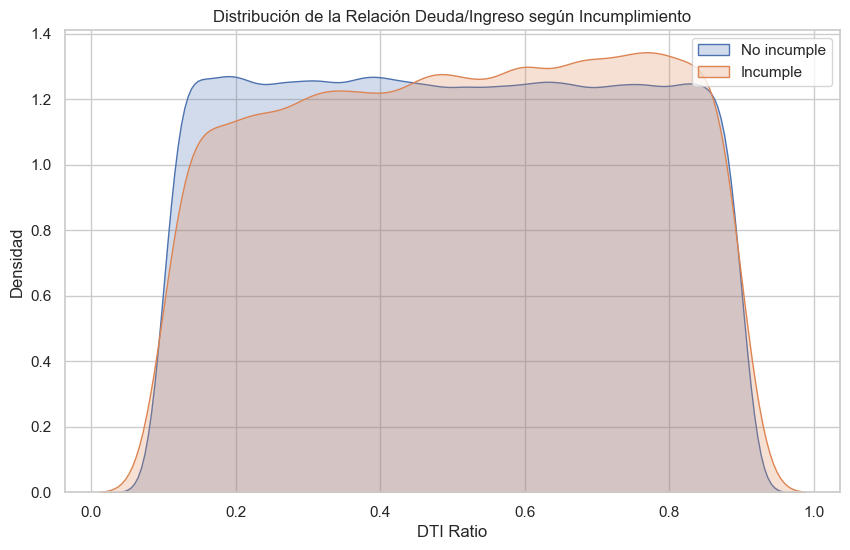

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de gráfico
sns.set(style="whitegrid")

# Gráfico KDE comparando DTIRatio por clase de Default
sns.kdeplot(data=data[data['Default'] == 0], x='DTIRatio', fill=True, label='No incumple')
sns.kdeplot(data=data[data['Default'] == 1], x='DTIRatio', fill=True, label='Incumple')

plt.title("Distribución de la Relación Deuda/Ingreso según Incumplimiento")
plt.xlabel("DTI Ratio")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [81]:
# Estadísticas descriptivas de DTI por clase de incumplimiento
print("No incumple:")
print(data['DTIRatio'].loc[data['Default'] == 0].describe())

print("\nSí incumple:")
print(data['DTIRatio'].loc[data['Default'] == 1].describe())

No incumple:
count    225694.000000
mean          0.498602
std           0.231099
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

Sí incumple:
count    29653.000000
mean         0.512467
std          0.229160
min          0.100000
25%          0.320000
50%          0.520000
75%          0.710000
max          0.900000
Name: DTIRatio, dtype: float64


c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


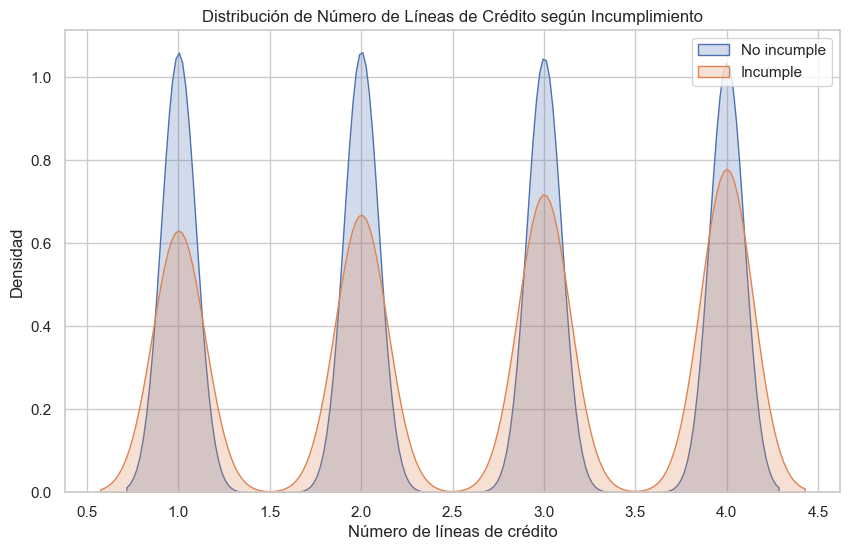

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo
sns.set(style="whitegrid")

# KDE comparando líneas de crédito según incumplimiento
sns.kdeplot(data=data[data['Default'] == 0], x='NumCreditLines', fill=True, label='No incumple')
sns.kdeplot(data=data[data['Default'] == 1], x='NumCreditLines', fill=True, label='Incumple')

plt.title("Distribución de Número de Líneas de Crédito según Incumplimiento")
plt.xlabel("Número de líneas de crédito")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## 10. Preparacion de los datos 

In [39]:
import pandas as pd

# Detectar columnas categóricas y excluir 'LoanID'
cat_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
cat_columns = [col for col in cat_columns if col != 'LoanID']  # ⚠️ Excluir ID

print("Columnas categóricas seleccionadas:", cat_columns)

# Aplicar one-hot encoding solo a columnas válidas
data_encoded = pd.get_dummies(data, columns=cat_columns, drop_first=True)

# Verifica que no saturaste la memoria
print("Shape final del DataFrame codificado:", data_encoded.shape)
data_encoded.head()

Columnas categóricas seleccionadas: ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
Shape final del DataFrame codificado: (255347, 26)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,False,False,False,True,True,False,False,False,True,True
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,False,True,False,False,False,False,False,False,True,True
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,True,False,False,True,True,False,False,False,False,False
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,False,True,False,False,False,True,False,False,False,False
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,True,False,False,False,True,False,False,False,False,False


In [42]:
# Definir explícitamente las columnas que deseas conservar
to_keep = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
           'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default']

# Crear subconjunto del DataFrame con copia segura
data_final = data[to_keep].copy()

# Eliminar columna si estuviera presente (por precaución)
if 'loan_applicant_id' in data_final.columns:
    data_final.drop(['loan_applicant_id'], axis=1, inplace=True)

# Mostrar columnas finales
print("Columnas finales del DataFrame:")
print(data_final.columns.values)

Columnas finales del DataFrame:
['Age' 'Income' 'LoanAmount' 'CreditScore' 'MonthsEmployed'
 'NumCreditLines' 'InterestRate' 'LoanTerm' 'DTIRatio' 'Default']


In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Separar X e y correctamente
X = data_final.drop('Default', axis=1)
y = data_final['Default']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Aplicar SMOTE para balancear
sm = SMOTE(random_state=42)
os_data_X, os_data_y = sm.fit_resample(X_train, y_train)

# Convertir a DataFrames para revisión y compatibilidad
os_data_X = pd.DataFrame(os_data_X, columns=X_train.columns)
os_data_y = pd.DataFrame(os_data_y, columns=['Default'])

# Verificar resultados
print("\033[1mTamaño del dataset balanceado:", len(os_data_X))
print("\033[1mNúmero de NO incumplimientos:", len(os_data_y[os_data_y['Default'] == 0]))
print("\033[1mNúmero de incumplimientos:", len(os_data_y[os_data_y['Default'] == 1]))
print("\033[1mProporción de NO incumplimiento:", len(os_data_y[os_data_y['Default'] == 0]) / len(os_data_X))
print("\033[1mProporción de incumplimiento:", len(os_data_y[os_data_y['Default'] == 1]) / len(os_data_X))

Tamaño del dataset balanceado: 302560
Número de NO incumplimientos: 151280
Número de incumplimientos: 151280
Proporción de NO incumplimiento: 0.5
Proporción de incumplimiento: 0.5


In [47]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Modelo base
logreg = LogisticRegression(max_iter=1000)

# RFE con número correcto de argumentos
rfe = RFE(estimator=logreg, n_features_to_select=9)

# Ajustar al dataset balanceado
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

# Resultados
print("Variables seleccionadas (True = seleccionada):")
print(rfe.support_)

print("Ranking de las variables (1 = más importante):")
print(rfe.ranking_)

# Mostrar nombres de las variables seleccionadas
data_final_vars = os_data_X.columns.tolist()
selected_features = [data_final_vars[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
print("\n✔️ Variables seleccionadas por RFE:")
print(selected_features)

Variables seleccionadas (True = seleccionada):
[ True  True  True  True  True  True  True  True  True]
Ranking de las variables (1 = más importante):
[1 1 1 1 1 1 1 1 1]

✔️ Variables seleccionadas por RFE:
['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']


In [48]:
os_data_X.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')

In [49]:
data_X1 = pd.DataFrame({
    'Feature': os_data_X.columns,
    'Importance': rfe.ranking_},)
data_X1.sort_values(by=['Importance'])

,Feature,Importance
0,Age,1
1,Income,1
2,LoanAmount,1
3,CreditScore,1
4,MonthsEmployed,1
5,NumCreditLines,1
6,InterestRate,1
7,LoanTerm,1
8,DTIRatio,1


In [50]:
cols=[]
for i in range (0, len(data_X1["Importance"])):
    if data_X1["Importance"][i] == 1:
        cols.append(data_X1["Feature"][i])
print(cols)
print(len(cols))

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
9


In [53]:
# Seleccionar solo las variables elegidas por RFE
X = os_data_X[cols]

# Corregir el nombre de la variable objetivo
y = os_data_y['Default']

## 11. Modelado

In [54]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.593697
         Iterations 5
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: Default          Pseudo R-squared: 0.143      
Date:               2025-04-07 21:19 AIC:              359275.7928
No. Observations:   302560           BIC:              359371.3731
Df Model:           8                Log-Likelihood:   -1.7963e+05
Df Residuals:       302551           LL-Null:          -2.0972e+05
Converged:          1.0000           LLR p-value:      0.0000     
No. Iterations:     5.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Age              -0.0390   0.0003 -138.6747 0.0000 -0.0396 -0.0385
Income           -0.0000   0.0000  -60.6952 0.0000 -0

In [56]:
# Extraer p-valores del resultado del modelo
pvalue = pd.DataFrame(result.pvalues, columns=['p_value'])
pvalue

,p_value
Age,0.000000e+00
Income,0.000000e+00
LoanAmount,0.000000e+00
CreditScore,1.937362e-20
MonthsEmployed,0.000000e+00
NumCreditLines,6.189910e-194
InterestRate,0.000000e+00
LoanTerm,5.657151e-89
DTIRatio,0.000000e+00


In [57]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])

if 'const' in pvs:
    pvs.remove('const')
else:
    pvs 
print(pvs)
print(len(pvs))

['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
9


C:\Users\ramse\AppData\Local\Temp\ipykernel_28428\1026593300.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pvalue["p_value"][i] < 0.05:


In [59]:
X = os_data_X[pvs]  # pvs: lista de variables seleccionadas previamente
y = os_data_y['Default']  # ✅ nombre correcto de la variable objetivo

import statsmodels.api as sm

logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.593697
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:               302560
Model:                          Logit   Df Residuals:                   302551
Method:                           MLE   Df Model:                            8
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.1435
Time:                        21:24:50   Log-Likelihood:            -1.7963e+05
converged:                       True   LL-Null:                   -2.0972e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -0.0390      0.000   -138.675      0.000      -0.040      -0.038
Income         -5

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## 12. Evaluacion

In [61]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.65


In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[33525 16583]
 [18080 31657]]


In [63]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions\033[1m")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions\033[1m")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  65182 correct predictions
 The result is telling us that we have:  34663 incorrect predictions
 We have a total predictions of:  99845


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66     50108
           1       0.66      0.64      0.65     49737

    accuracy                           0.65     99845
   macro avg       0.65      0.65      0.65     99845
weighted avg       0.65      0.65      0.65     99845



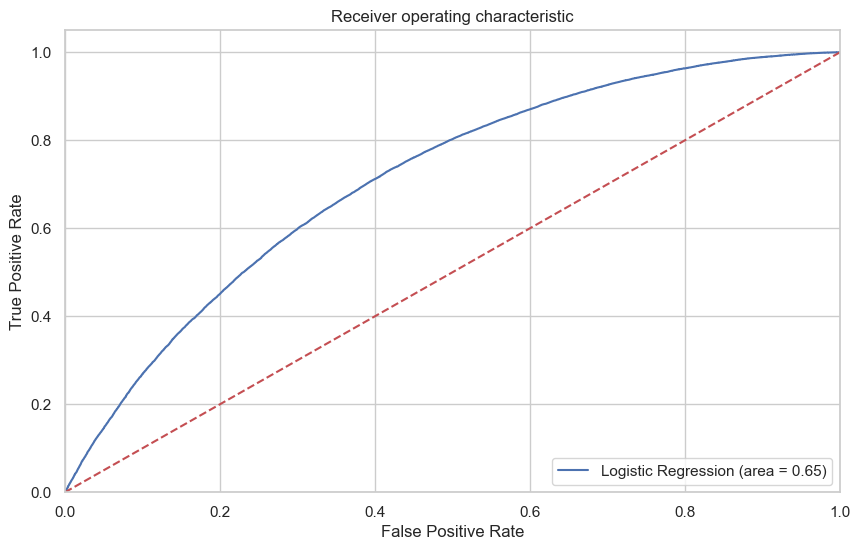

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set(style="whitegrid", color_codes=True)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 13. Despliege

In [68]:
# Volver a cargar el archivo original
original_data = pd.read_csv("Loan_default.csv")

# Agregar LoanID al DataFrame actual (data debe tener el mismo orden que original_data)
data['LoanID'] = original_data['LoanID']

# Calcular probabilidad de default
data['PD'] = logreg.predict_proba(data[X_train.columns])[:, 1]

# Mostrar los primeros 10
data[['LoanID', 'PD']].head(10)

,LoanID,PD
0,I38PQUQS96,0.186609
1,HPSK72WA7R,0.251000
2,C1OZ6DPJ8Y,0.430246
3,V2KKSFM3UN,0.537938
4,EY08JDHTZP,0.243598
5,A9S62RQ7US,0.677243
6,H8GXPAOS71,0.423226
7,0HGZQKJ36W,0.303880
8,1R0N3LGNRJ,0.614886
9,CM9L1GTT2P,0.447463


In [69]:
X_train.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'],
      dtype='object')

In [73]:
new_data = np.array([3,57,14.26,2.993,0,1,0,0,0]).reshape(1, -1)
new_pred=logreg.predict_proba(new_data)[:,1][0]
print("\033[1m Este nuevo prospecto tiene un {:.2%}".format(new_pred), "de probabilidad de incumplimiento en un credito nuevo")

 Este nuevo prospecto tiene un 46.99% de probabilidad de incumplimiento en un credito nuevo


c:\Users\ramse\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Histograma de PDs

c:\Users\ramse\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


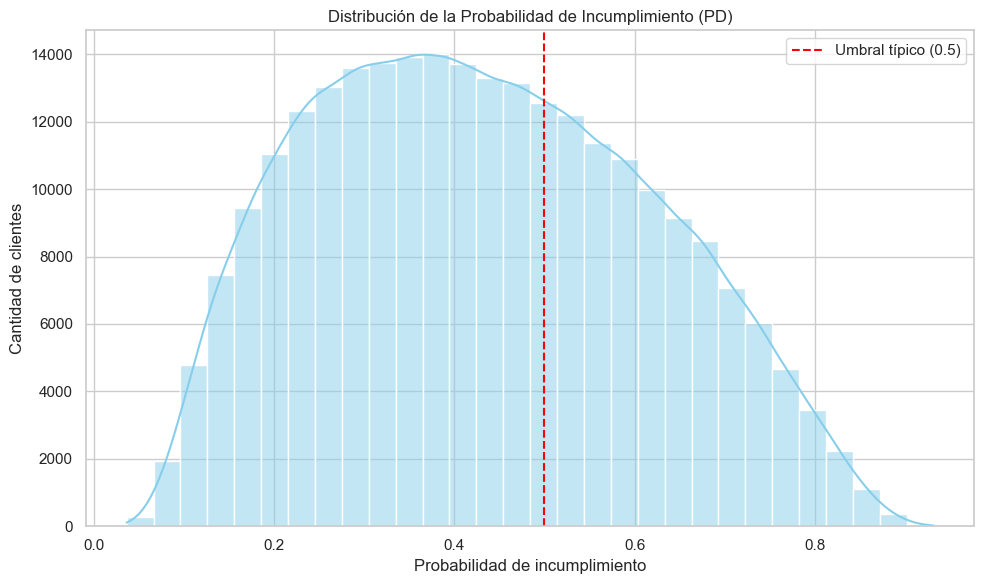

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['PD'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de la Probabilidad de Incumplimiento (PD)")
plt.xlabel("Probabilidad de incumplimiento")
plt.ylabel("Cantidad de clientes")
plt.axvline(0.5, color='red', linestyle='--', label='Umbral típico (0.5)')
plt.legend()
plt.tight_layout()
plt.show()

Top 20 clientes con mayor riesgo

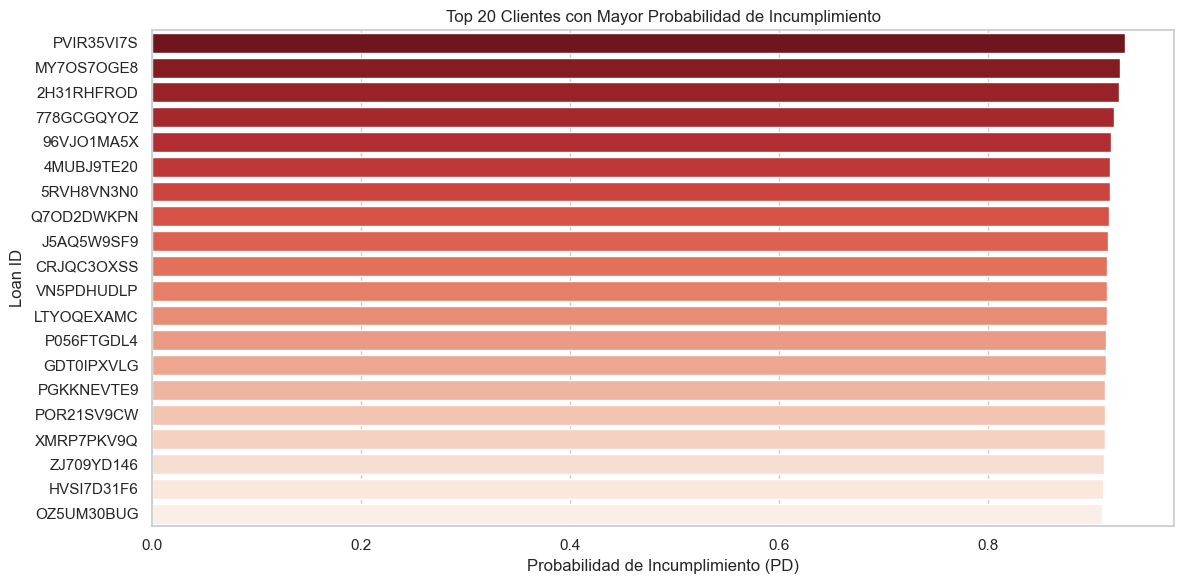

In [84]:
# Ordenar por PD descendente y mostrar top 20
top_risk = data[['LoanID', 'PD']].sort_values(by='PD', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_risk, x='PD', y='LoanID', palette='Reds_r')
plt.title("Top 20 Clientes con Mayor Probabilidad de Incumplimiento")
plt.xlabel("Probabilidad de Incumplimiento (PD)")
plt.ylabel("Loan ID")
plt.tight_layout()
plt.show()